In [27]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 
import os 
import PIL 
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
import pathlib
from sklearn.model_selection import train_test_split


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 134s 1us/step


In [5]:
data_dir

'.\\datasets\\flower_photos'

In [7]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [13]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [14]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

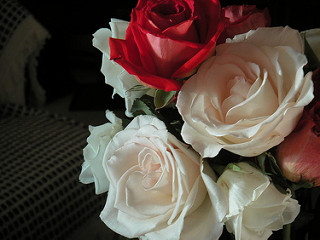

In [15]:
PIL.Image.open(str(roses[1]))

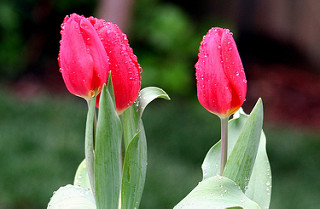

In [16]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [20]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [21]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [22]:
img.shape

(240, 179, 3)

In [24]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [25]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
X = np.array(X)
y = np.array(y)

**Train Test Split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Preprocessing: scale images**

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Build convolutional neural network and train it**

In [31]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 253ms/step - accuracy: 0.3264 - loss: 1.6370
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - accuracy: 0.5781 - loss: 1.0584
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.6686 - loss: 0.8713
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.7493 - loss: 0.6792
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.8388 - loss: 0.4322
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.9085 - loss: 0.2835
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.9612 - loss: 0.1485
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.9767 - loss: 0.0892
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.9823 - loss: 0.0640
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.9769 - loss: 0.0678
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.9828 - loss: 0.0618
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6326 - loss: 3.0905


[3.009701728820801, 0.6405228972434998]

In [33]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step


array([[ 10.408669  ,  20.960535  ,   3.2272668 , -25.76918   ,
          1.3910081 ],
       [  8.616821  ,  -3.861036  ,  -9.945704  ,  -0.13724956,
          5.8531256 ],
       [  1.4498785 ,   8.052425  ,  16.586712  ,  -8.804811  ,
         -8.518469  ],
       ...,
       [  8.217359  ,  -9.178415  ,  -4.6181736 ,   6.863235  ,
          9.06375   ],
       [ -2.3610404 ,   7.5985785 ,   5.259878  , -11.59966   ,
          0.5752011 ],
       [  3.4085014 , -21.03074   ,  -0.08490724,   8.552938  ,
          6.327557  ]], dtype=float32)

In [34]:
score = tf.nn.softmax(predictions[0])

In [35]:
np.argmax(score)

np.int64(1)

In [36]:
y_test[0]

np.int64(1)

**Improve Test Accuracy Using Data Augmentation**

In [43]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


**Original Image**

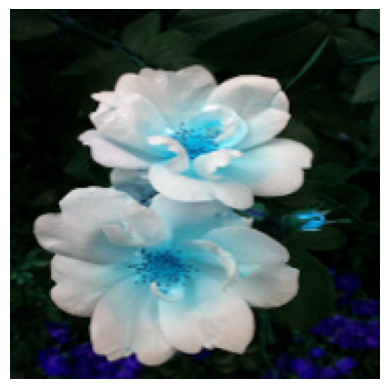

In [44]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

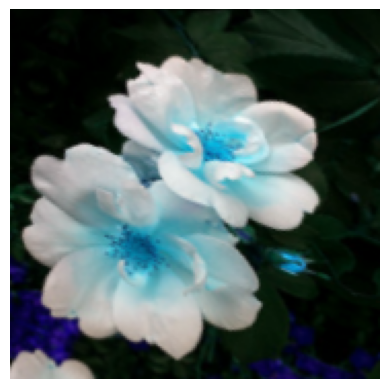

In [45]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [46]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 339ms/step - accuracy: 0.3821 - loss: 1.4528
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 338ms/step - accuracy: 0.5819 - loss: 1.1000
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 336ms/step - accuracy: 0.6376 - loss: 0.9275
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 336ms/step - accuracy: 0.6463 - loss: 0.9317
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 335ms/step - accuracy: 0.6979 - loss: 0.7933
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.7138 - loss: 0.7550
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 337ms/step - accuracy: 0.7378 - loss: 0.7041
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 337ms/step - accuracy: 0.7373 - loss: 0.6858
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 336ms/step - accuracy: 0.7524 - loss: 0.6400
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 336ms/step - accuracy: 0.7886 - loss: 0.5930
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 335ms/step - accuracy: 0.7710 - loss: 0.5748
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29

In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7533 - loss: 0.9658


[0.9299730062484741, 0.7538126111030579]